In [3]:
# make sure to use the ptitvenv environment

import pandas as pd
import matplotlib.pyplot as plt
import ptitprince as pt
from mimic_constants_ptit import get_mask_stats_csv, home_out_dir, get_barcode_order_info
from os import makedirs
#from mimic_constants import *

mask_type_strs = {'ig': 'Integrated Gradients', 'saliency': 'Saliency'}

In [21]:
def raincloud(image_type, suffix, mask_type, label, run_id=None, verbose=False):
    stats_df = get_mask_stats_csv(image_type, suffix, mask_type, label)
    
    save_dir_1 = home_out_dir / f"saliency_viz/{image_type}-{suffix}/{mask_type}/{label.lower().replace(' ', '_')}"
    
    if not verbose:
        makedirs(save_dir_1, exist_ok=True)
        #makedirs(save_dir_2, exist_ok=True)

    mask_type_str = mask_type_strs[mask_type]
    statistics = ['mean', 'median', 'min', '25th_percentile', '75th_percentile', 'max', 'std_mean', 'std_median']

    for orient, fig_dimensions in zip(['v', 'h'], [(12, 6), (6, 6)]):
        if orient == 'h':
            continue        
        
        for idx, stat in enumerate(statistics):
            plt.figure(figsize=(10, 6))
            # Define color palette for the plot
            colors = ['#ff0000', '#ff7f00', '#ffae00', '#fff500', '#a2ff00', '#00ff29', '#00ffce', '#00c9ff', '#2700ff', '#ab00ff']    
            # Create figure and axis objects
            fig, ax = plt.subplots(figsize=fig_dimensions)

            # Define the line width properties
            # line_width_props = {
            #     'whiskerprops': {'linewidth': 2},
            #     'capprops': {'linewidth': 2},
            #     'boxprops': {'linewidth': 2},
            # }
            # Generate the raincloud plot
            pt.RainCloud(x="area", y=stat, data=stats_df, palette=colors, 
                        bw=.2, 
                        ax=ax, orient=orient,
                        box_linewidth=1,  # Modify the boxplot linewidth
                        offset=.2,  # Adjust the cloud position
                        move=.2,  # Adjust the rain position
                        width_viol=.6,  # Reduce violin width
                        )

            # Adjust the plot margins to prevent cutting off the rightmost rain only for vertical orientation
            # Adjust the y-axis limits to show the full peak
            if orient == 'v':
                plt.subplots_adjust(right=0.95)  # Increase right margin for vertical orientation
                y_min, y_max = ax.get_ylim()
                ax.set_ylim(y_min, y_max * 1.1)  # Increase the upper limit by 10%

            plt.title(f"Box Plot of {stat.capitalize()} Across Pertinent Areas of {mask_type_str} Maps \
            \n for {label.capitalize()} (Image Type: {image_type.capitalize()})")
            #, Barcode Order: {suffix.replace('_', ', ')} \
            plt.ylabel(f"{stat.capitalize()} Value")
            plt.xlabel('Areas', fontweight='bold')
            plt.tight_layout()
            
            if verbose:
                plt.show()
            else:
                fname = f"{idx}_raincloud_{stat}.pdf"
                if orient == 'v':
                    fname = fname.replace('.pdf', '_vertical.pdf')
                elif orient == 'h':
                    fname = fname.replace('.pdf', '_horizontal.pdf')    
                plt.savefig(save_dir_1/fname, bbox_inches='tight', dpi=300)
                #plt.savefig(save_dir_2/fname, bbox_inches='tight', dpi=300)
                plt.close()

<Figure size 1000x600 with 0 Axes>

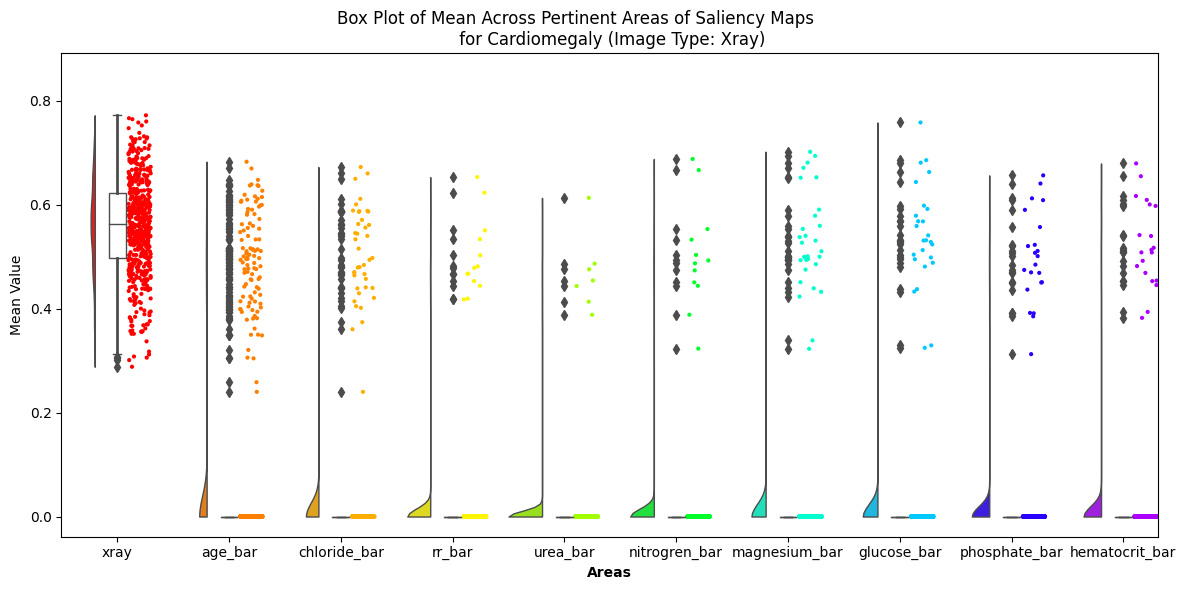

<Figure size 1000x600 with 0 Axes>

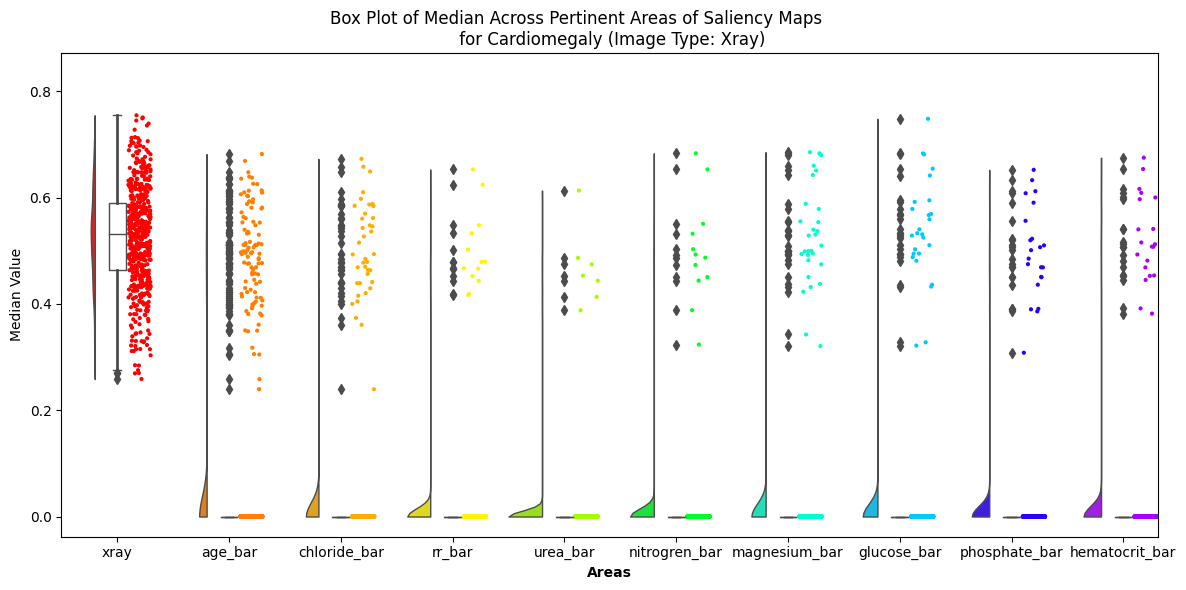

<Figure size 1000x600 with 0 Axes>

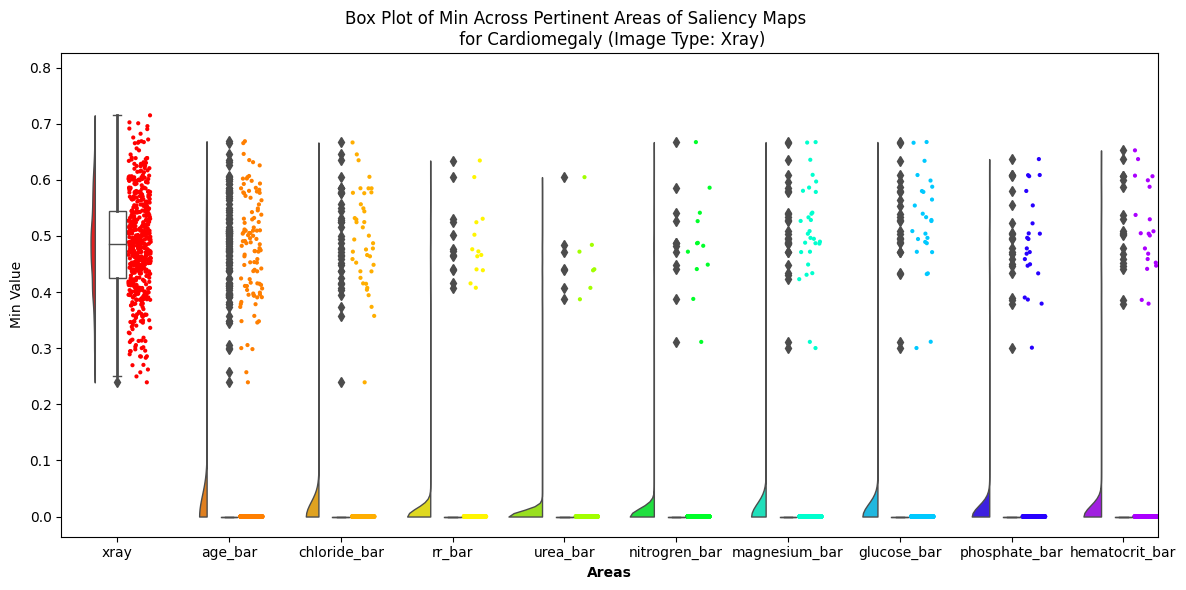

<Figure size 1000x600 with 0 Axes>

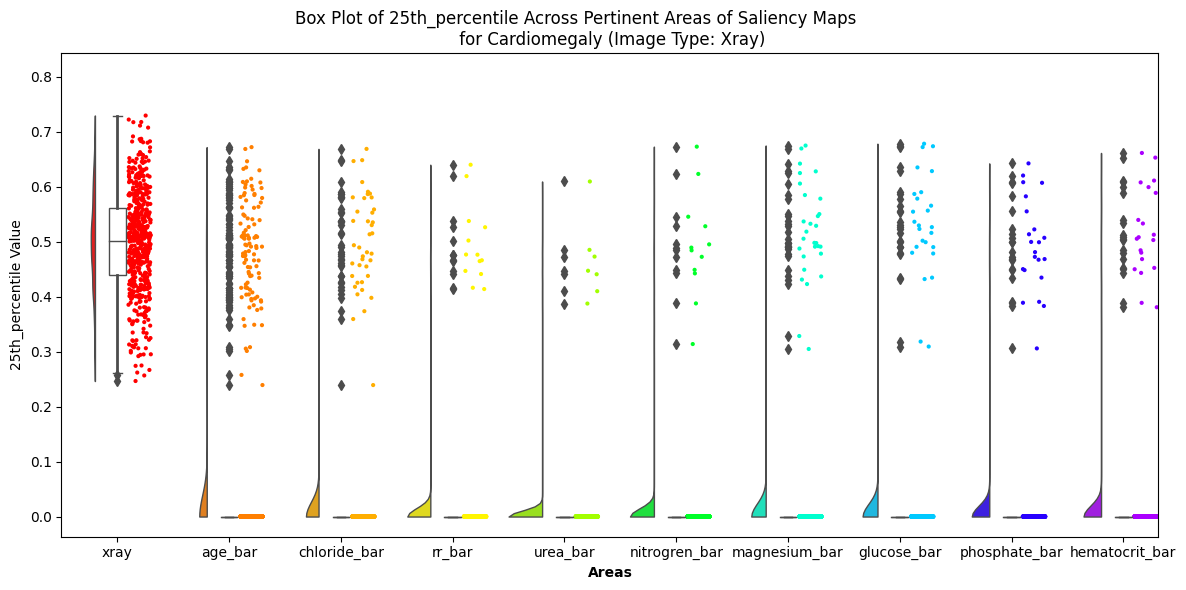

<Figure size 1000x600 with 0 Axes>

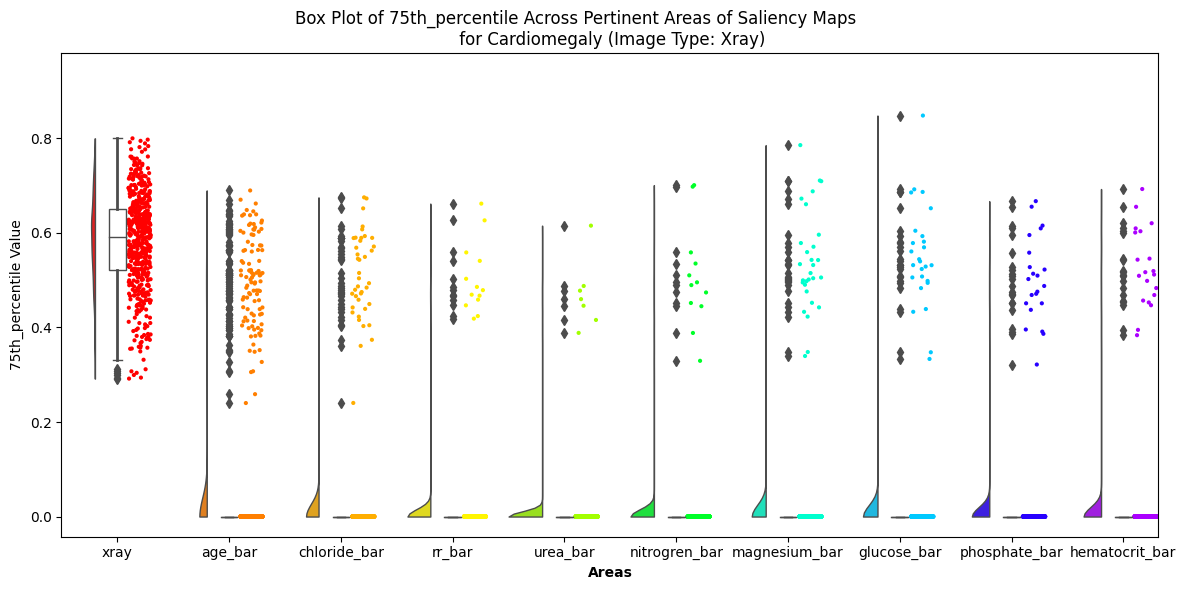

<Figure size 1000x600 with 0 Axes>

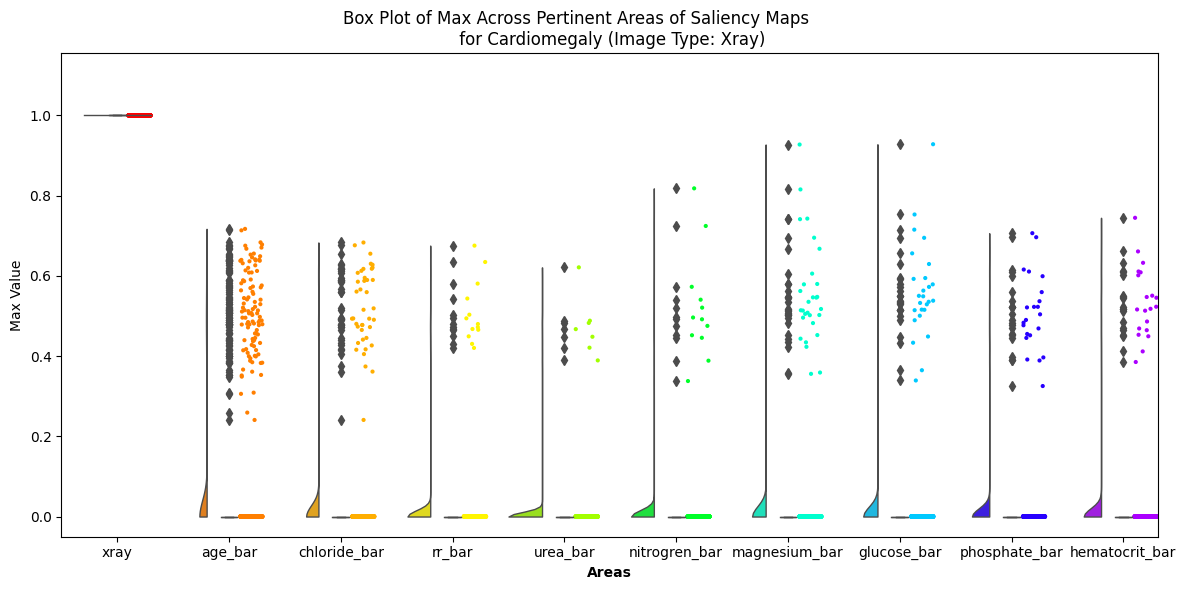

<Figure size 1000x600 with 0 Axes>

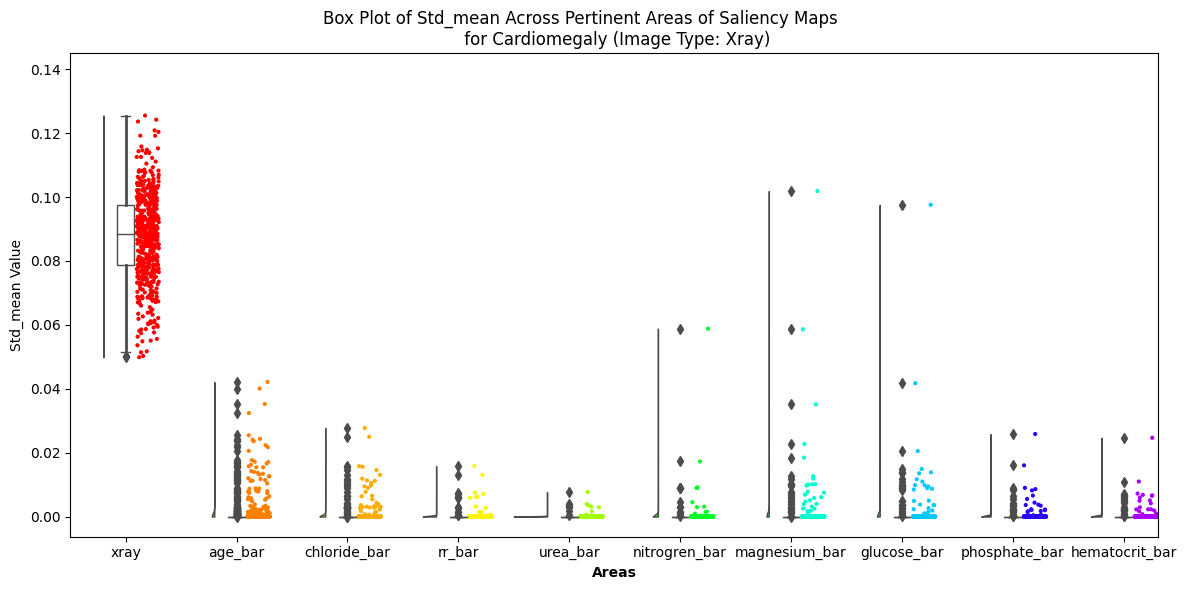

<Figure size 1000x600 with 0 Axes>

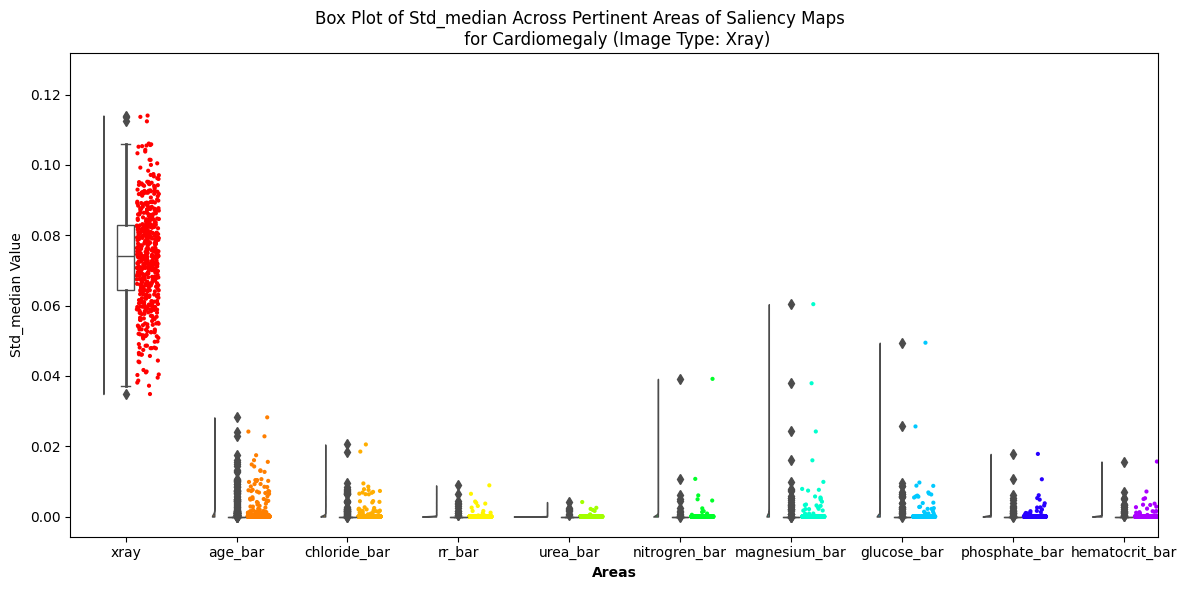

In [19]:
image_type='xray'
mask_type = 'saliency'
label = 'Cardiomegaly'
order, suffix = get_barcode_order_info(order=None, no_bars=False, nan=False)
raincloud(image_type, suffix, mask_type, label, run_id=None, verbose=True)

In [22]:
raincloud('xray', suffix, mask_type, label, run_id=None, verbose=False)
raincloud('blank', suffix, mask_type, label, run_id=None, verbose=False)
raincloud('noise', suffix, mask_type, label, run_id=None, verbose=False)

/tmp/ipykernel_3633/7967989.py:22: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize=fig_dimensions)
/tmp/ipykernel_3633/7967989.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(10, 6))


<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>